## Imports


In [5]:
import os
import leafmap
import rasterio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt
from samgeo import SamGeo, tms_to_geotiff, get_basemaps
# mosaic_true_color_HLS_file = os.path.abspath("granules/T35UPQ_2022080/T35UPQ_2022080_true_color_mosaic.tif")
mosaic_true_color_HLS_file_uint8 = os.path.abspath("granules/T35UPQ_2022080/T35UPQ_2022080_true_color_mosaic_uint8.tif")

## Display Example Mosaic of granule bands in Rasterio


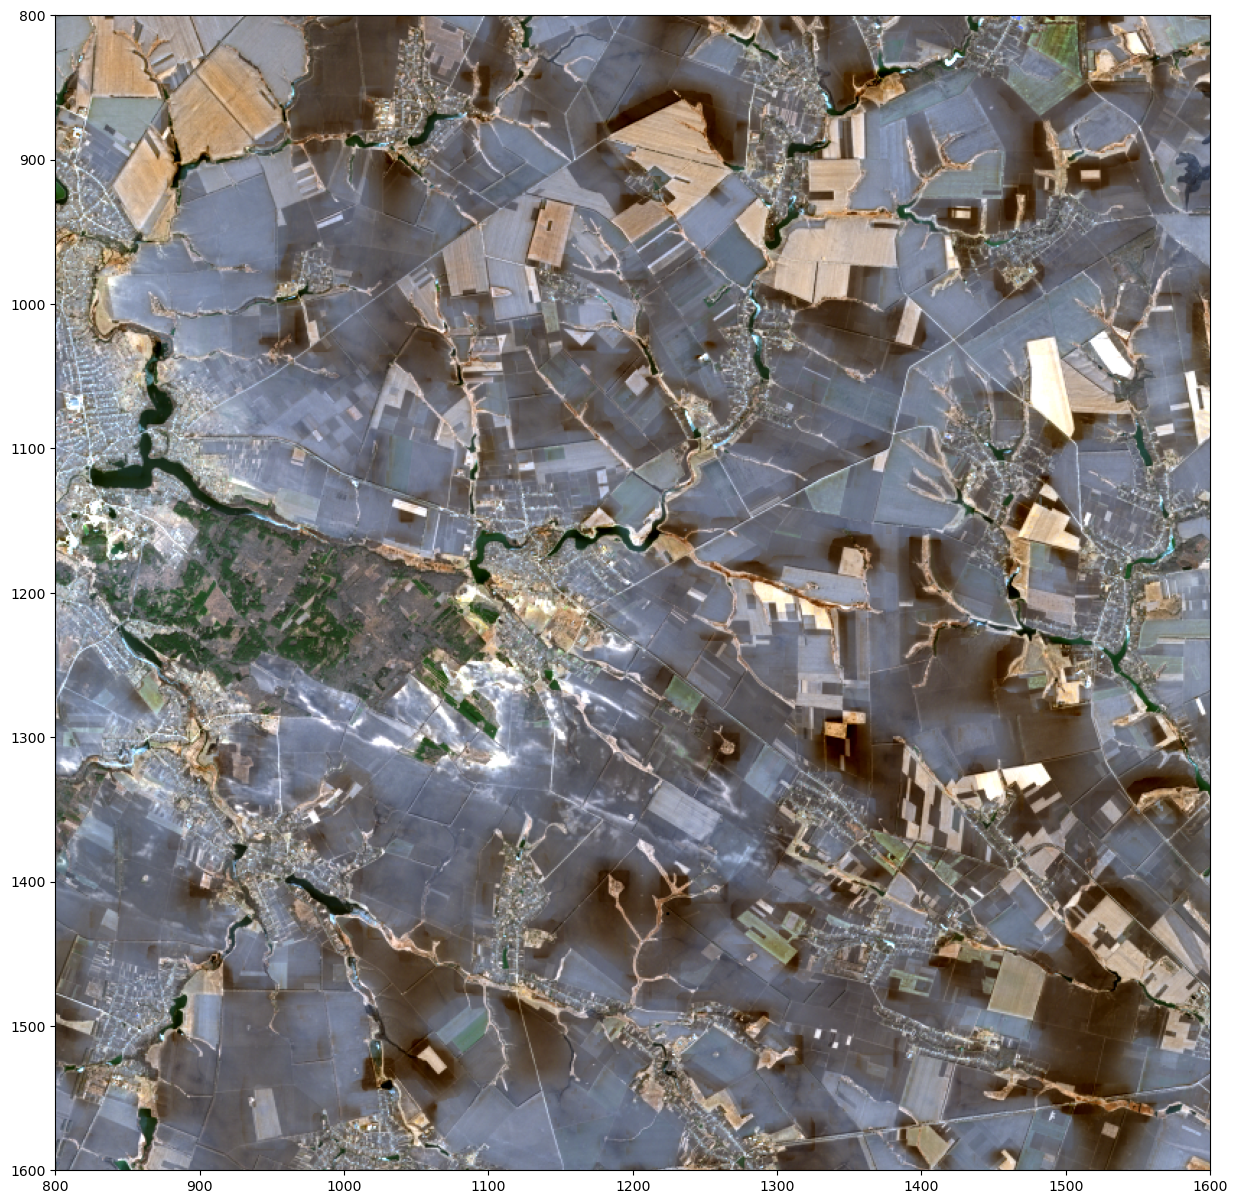

In [2]:


# Open the file
with rasterio.open(mosaic_true_color_HLS_file) as src:
    # Read the data
    img = src.read([1, 2, 3])  # read the RGB bands (Which are actually bands 4, 3, 2)

# Define the min and max values for each band
min_values = np.array([-1, -1, -1])
max_values = np.array([1401, 1020, 718])

# Normalize the bands
img = img.astype(float)
for band in range(img.shape[0]):
    img[band] = (img[band] - min_values[band]) / (max_values[band] - min_values[band])

# Transpose the array shape to fit the format expected by matplotlib (rows, columns, bands)
img = img.transpose(1, 2, 0)

# Clip values to be between 0 and 1
img = np.clip(img, 0, 1)

# Display the image
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.xlim(800, 1600)  # Replace these values with the x-range you want to focus on
plt.ylim(1600, 800)  # Replace these values with the y-range you want to focus on

plt.show()

In [7]:
m = leafmap.Map(center=[49.15077, 28.32715], zoom=19)


m.add_raster(mosaic_true_color_HLS_file_uint8, band=1, palette="gray", layer_name="Segmented Granules")

m

Map(center=[49.15077, 28.32715], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

## Segmentation


In [3]:
sam = SamGeo(
    model_type="vit_h",
    checkpoint="sam_vit_h_4b8939.pth",
    sam_kwargs=None,
)

In [ ]:
sam.generate(source=mosaic_true_color_HLS_file_uint8, output="HLS_segment.tif", batch=True)

## Polygonize the raster segments

In [ ]:
sam.tiff_to_gpkg(tiff_path="HLS_segment.tif", output="HLS_segmentation_polygons.gpkg")